In [23]:
#Importing packages
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import graphviz
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.model_selection import train_test_split


In [97]:
#Importing the cleaned data
data = pd.read_csv("/Users/linaelkjaerpedersen/Desktop/Datascience/Exam/R-code/full_df.csv")

print(data)

#Moving "id" to the first column, so diabetes (the target column) is the last
data = data[ ['id'] + [ col for col in data.columns if col != 'id' ] ]

#Deleting the unnamed column (just a duplicate of id)
#First rename the column
data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)

# Then, drop the column as usual.
data.drop(["a"], axis=1, inplace=True)

#Inspecting that all looks good
data

       Unnamed: 0  gender   age  hypertension  heart_disease  smoking_history  \
0               1       0  80.0             0              1                0   
1               2       0  54.0             0              0                5   
2               3       1  28.0             0              0                0   
3               4       0  36.0             0              0                1   
4               5       1  76.0             1              1                1   
...           ...     ...   ...           ...            ...              ...   
99977       99978       0  80.0             0              0                5   
99978       99979       0   2.0             0              0                5   
99979       99980       1  66.0             0              0                3   
99980       99981       0  24.0             0              0                0   
99981       99982       0  57.0             0              0                1   

         bmi  HbA1c_level  

,id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,0,80.0,0,1,0,25.19,6.6,140,0
1,2,0,54.0,0,0,5,27.32,6.6,80,0
2,3,1,28.0,0,0,0,27.32,5.7,158,0
3,4,0,36.0,0,0,1,23.45,5.0,155,0
4,5,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...
99977,99978,0,80.0,0,0,5,27.32,6.2,90,0
99978,99979,0,2.0,0,0,5,17.37,6.5,100,0
99979,99980,1,66.0,0,0,3,27.83,5.7,155,0
99980,99981,0,24.0,0,0,0,35.42,4.0,100,0


In [98]:
#Splitting data into predictor variables and target variable
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

print(X)
y

[[  0.    80.     0.   ...  25.19   6.6  140.  ]
 [  0.    54.     0.   ...  27.32   6.6   80.  ]
 [  1.    28.     0.   ...  27.32   5.7  158.  ]
 ...
 [  1.    66.     0.   ...  27.83   5.7  155.  ]
 [  0.    24.     0.   ...  35.42   4.   100.  ]
 [  0.    57.     0.   ...  22.43   6.6   90.  ]]


array([0, 0, 0, ..., 0, 0, 0])

In [102]:
#Splitting into test and train set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst_2 = XGBClassifier(objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
bst_2.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
preds_2 = bst_2.predict(X_test)

#Summing number of correct and wrong predictions
correct = 0
wrong = 0

for i in range(len(preds_2)):
    if preds_2[i] == y_test[i]:
        correct += 1
    else: 
        wrong += 1


print(correct)
print(wrong)


print("Optimal score on test: " + str(bst_optimal.score(X_test, y_test)))
#print("Optimal score on train: "+ str(bst_optimal.score(X_train, y_train)))

print("score on test: " + str(bst.score(X_test, y_test)))
#print("score on train: "+ str(bst.score(X_train, y_train)))

print("Default, score on test: " + str(bst_2.score(X_test, y_test)))
#print("Default, score on train: "+ str(bst_2.score(X_train, y_train)))


19403
594
Optimal score on test: 0.9713957093564035
score on test: 0.9710456568485273
Default, score on test: 0.9702955443316498


In [19]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))


score on test: 0.9613442016302446
score on train: 0.9601175220353816


In [80]:
#Second step

# Import the library
from hgboost import hgboost

# Initialize library.
# These are the defaults
hgb = hgboost(
    max_eval=250,      # Search space is based  on the number of evaluations.
    threshold=0.5,     # Classification threshold. In case of two-class model this is 0.5.
    cv=5,              # k-folds cross-validation.
    test_size=0.2,     # Percentage split for the testset.
    val_size=0.2,      # Percentage split for the validationset.
    top_cv_evals=10,   # Number of top best performing models that is evaluated.
    is_unbalance=True, # Control the balance of positive and negative weights, useful for unbalanced classes.
    random_state=None, # Fix the random state to create reproducible results.
    n_jobs=-1,         # The number of CPU jobs to run in parallel. -1 means using all processors.
    gpu=False,         # Compute using GPU in case of True.
    verbose=3,         # Print progress to screen.
)

In [72]:
#Importing the cleaned data
data = pd.read_csv("/Users/linaelkjaerpedersen/Desktop/Datascience/Exam/R-code/full_df.csv")

#Moving "id" to the first column, so diabetes (the target column) is the last
data = data[ ['id'] + [ col for col in data.columns if col != 'id' ] ]

#Deleting the unnamed column (just a duplicate of id)
#First rename the column
data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)

# Then, drop the column as usual.
data.drop(["a"], axis=1, inplace=True)

#Inspecting that all looks good
data

,id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,0,80.0,0,1,0,25.19,6.6,140,0
1,2,0,54.0,0,0,5,27.32,6.6,80,0
2,3,1,28.0,0,0,0,27.32,5.7,158,0
3,4,0,36.0,0,0,1,23.45,5.0,155,0
4,5,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...
99977,99978,0,80.0,0,0,5,27.32,6.2,90,0
99978,99979,0,2.0,0,0,5,17.37,6.5,100,0
99979,99980,1,66.0,0,0,3,27.83,5.7,155,0
99980,99981,0,24.0,0,0,0,35.42,4.0,100,0


In [73]:


#Splitting data into predictor variables and target variable
y = data['diabetes'].values

data.drop(['diabetes', 'id'], axis=1, inplace=True)

X = hgb.preprocessing(data)
I = ~np.isnan(y)
y = y[I]



[df2onehot] >Auto detecting dtypes.


100%|██████████| 8/8 [00:01<00:00,  4.60it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 8/8 [00:00<00:00, 15.23it/s]

[df2onehot] >Total onehot features: 29


In [75]:
for i in range(len(y_2)):
    if y_2[i] != y[i]:
        print("FALSE")

In [82]:
# Fit model for a classification task.
hgb.xgboost(X, y, pos_label=1)

[hgboost] >Start hgboost classification.
[hgboost] >Collecting xgb_clf parameters.
[hgboost] >Correct for unbalanced classes using [scale_pos_weight]..
[hgboost] >[13] hyperparameters in gridsearch space. Used loss function: [auc].
[hgboost] >method: xgb_clf
[hgboost] >eval_metric: auc
[hgboost] >greater_is_better: True
[hgboost] >*********************************************************************************
[hgboost] >Total dataset: (99982, 29) 
[hgboost] >Validation set: (19997, 29) 
[hgboost] >Test-set: (19997, 29) 
[hgboost] >Train-set: (59988, 29) 
[hgboost] >*********************************************************************************
[hgboost] >Searching across hyperparameter space for best performing parameters using maximum nr. evaluations: 250
100%|██████████| 250/250 [16:54<00:00,  4.06s/trial, best loss: -0.978991589749525] 
[hgboost]> Collecting the hyperparameters from the [250] trials.
[hgboost] >[auc]: 0.979 Best performing model across 250 iterations using Bayes

{'params': {'colsample_bytree': 0.8200000000000001,
  'gamma': 0.5,
  'learning_rate': 0.11176848229548976,
  'max_depth': 5,
  'min_child_weight': 2.0,
  'n_estimators': 140,
  'subsample': 0.81},
 'summary':     booster colsample_bytree gamma gpu_id learning_rate max_depth  \
 0    gbtree             0.76   0.5      0      0.413893        23   
 1    gbtree             0.97     3      0       0.04054        23   
 2    gbtree             0.65     4      0      0.243589        29   
 3    gbtree             0.94     4      0      0.052966         8   
 4    gbtree             0.91   1.5      0      0.042452         7   
 ..      ...              ...   ...    ...           ...       ...   
 246  gbtree             0.92   0.5      0      0.295625         9   
 247  gbtree             0.95   0.5      0      0.455963         5   
 248  gbtree             0.78   0.5      0      0.078373         5   
 249  gbtree              0.8   0.5      0      0.470917         5   
 250     NaN         

In [87]:
# Fit model for a classification task.
results = hgb.xgboost(X, y, pos_label=1)

[hgboost] >Start hgboost classification.
[hgboost] >Collecting xgb_clf parameters.
[hgboost] >Correct for unbalanced classes using [scale_pos_weight]..
[hgboost] >[13] hyperparameters in gridsearch space. Used loss function: [auc].
[hgboost] >method: xgb_clf
[hgboost] >eval_metric: auc
[hgboost] >greater_is_better: True
[hgboost] >*********************************************************************************
[hgboost] >Total dataset: (99982, 29) 
[hgboost] >Validation set: (19997, 29) 
[hgboost] >Test-set: (24796, 29) 
[hgboost] >Train-set: (55189, 29) 
[hgboost] >*********************************************************************************
[hgboost] >Searching across hyperparameter space for best performing parameters using maximum nr. evaluations: 250
100%|██████████| 250/250 [15:41<00:00,  3.77s/trial, best loss: -0.9804106961725497]
[hgboost]> Collecting the hyperparameters from the [250] trials.
[hgboost] >[auc]: 0.9804 Best performing model across 250 iterations using Baye

In [91]:
# Results are also returned by the model:
#print(results.keys())

# The params contains the parameters to create the best performing model.
print(results['params'])

# The summary contains the model evaluations.
#print(results['summary'])




{'colsample_bytree': 0.41000000000000003, 'gamma': 2, 'learning_rate': 0.09041224674389757, 'max_depth': 6, 'min_child_weight': 1.0, 'n_estimators': 175, 'subsample': 0.63}


In [99]:

#Splitting into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

#Using the hyperparameters from the bayesian optimization
bst_optimal = XGBClassifier(colsample_bytree = 0.41000000000000003, gamma = 2, learning_rate=0.0941224674389757,  max_depth=6, min_child_weight = 1, n_estimators=175, subsample = 0.63)

# fit model
bst_optimal.fit(X_train, y_train)
# make predictions
preds_optimal = bst_optimal.predict(X_test)

#Summing number of correct and wrong predictions
correct = 0
wrong = 0

for i in range(len(preds_optimal)):
    if preds_optimal[i] == y_test[i]:
        correct += 1
    else: 
        wrong += 1


print(correct)
print(wrong)


print("score on test: " + str(bst_optimal.score(X_test, y_test)))
print("score on train: "+ str(bst_optimal.score(X_train, y_train)))


19425
572
score on test: 0.9713957093564035
score on train: 0.9730074388947928


{'params': {'colsample_bytree': 0.8200000000000001, 'gamma': 0.5, 'learning_rate': 0.11176848229548976, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 140, 'subsample': 0.81}, 'summary':     booster colsample_bytree gamma gpu_id learning_rate max_depth  \
0    gbtree             0.76   0.5      0      0.413893        23   
1    gbtree             0.97     3      0       0.04054        23   
2    gbtree             0.65     4      0      0.243589        29   
3    gbtree             0.94     4      0      0.052966         8   
4    gbtree             0.91   1.5      0      0.042452         7   
..      ...              ...   ...    ...           ...       ...   
246  gbtree             0.92   0.5      0      0.295625         9   
247  gbtree             0.95   0.5      0      0.455963         5   
248  gbtree             0.78   0.5      0      0.078373         5   
249  gbtree              0.8   0.5      0      0.470917         5   
250     NaN             None  None    NaN   

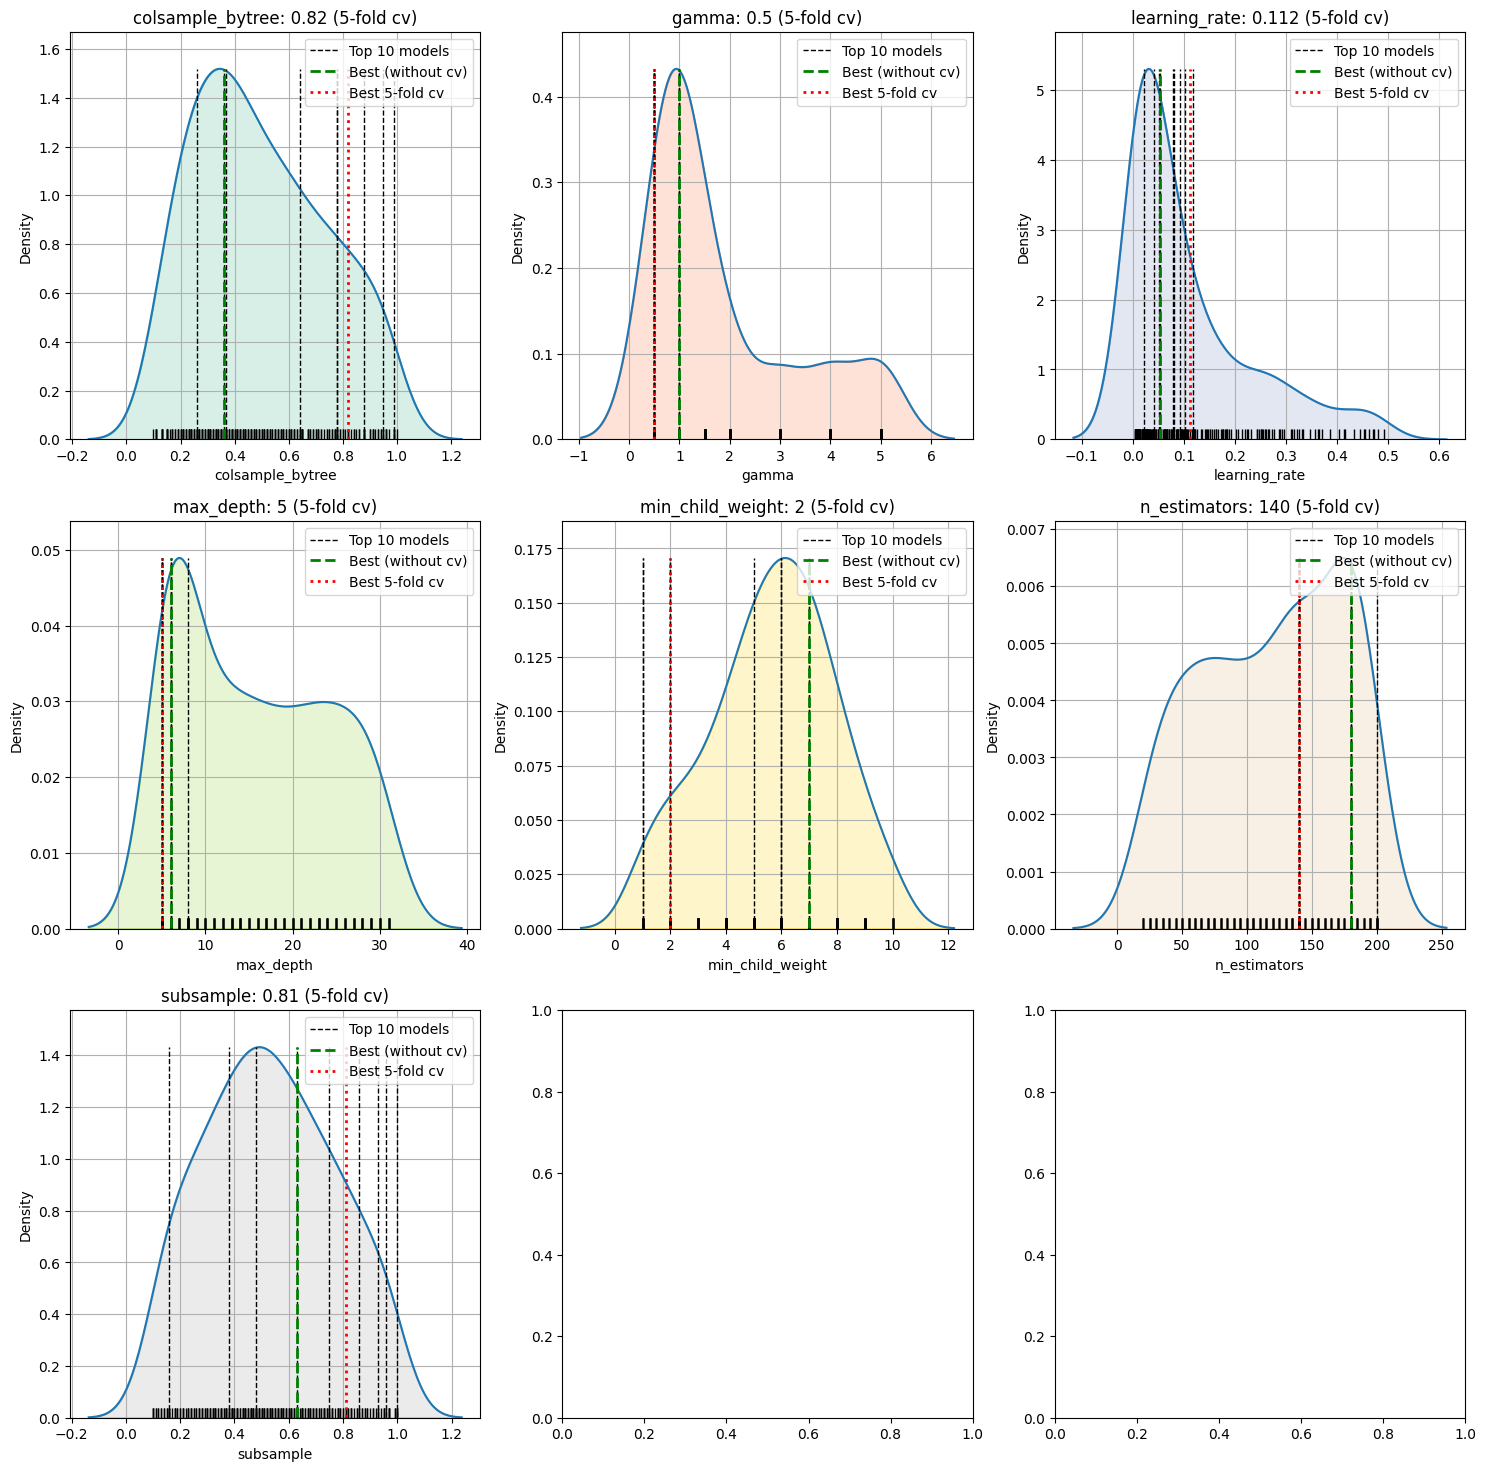

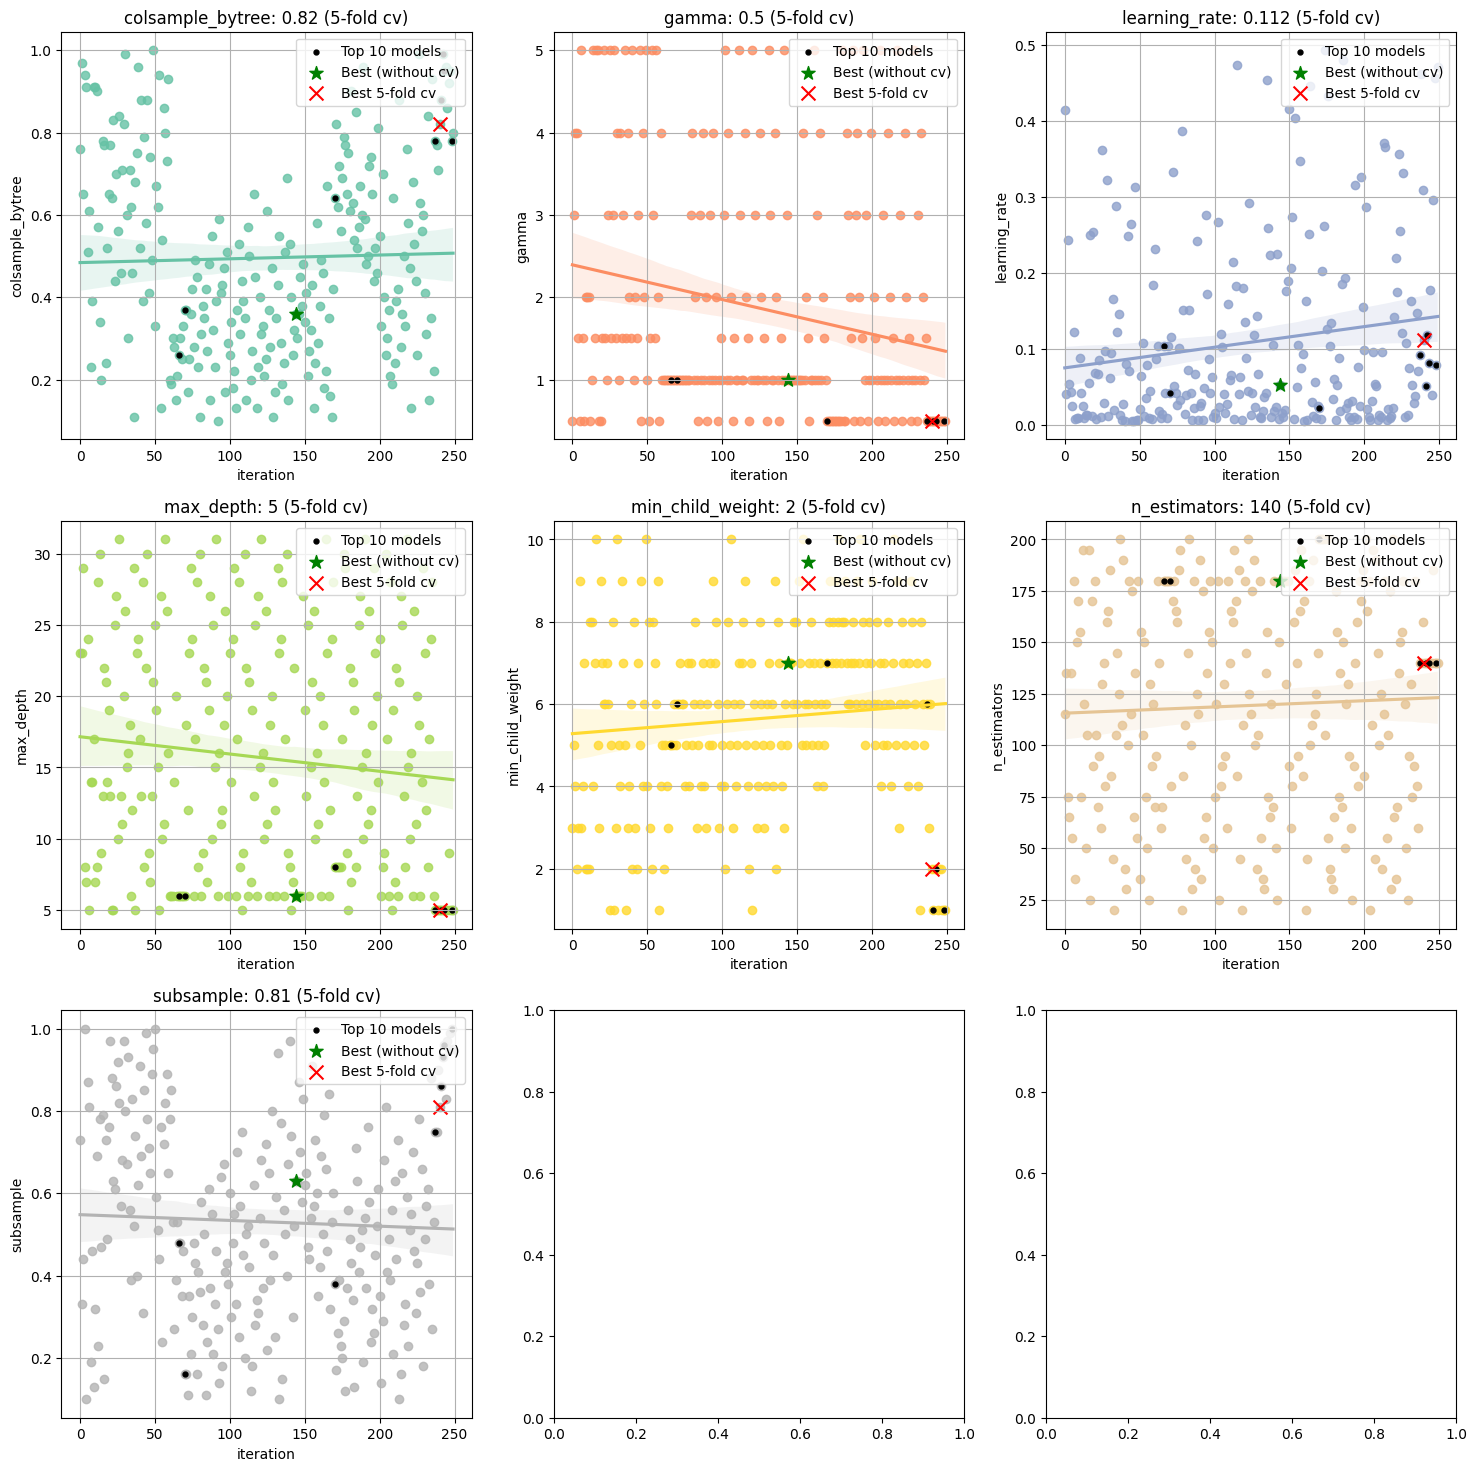

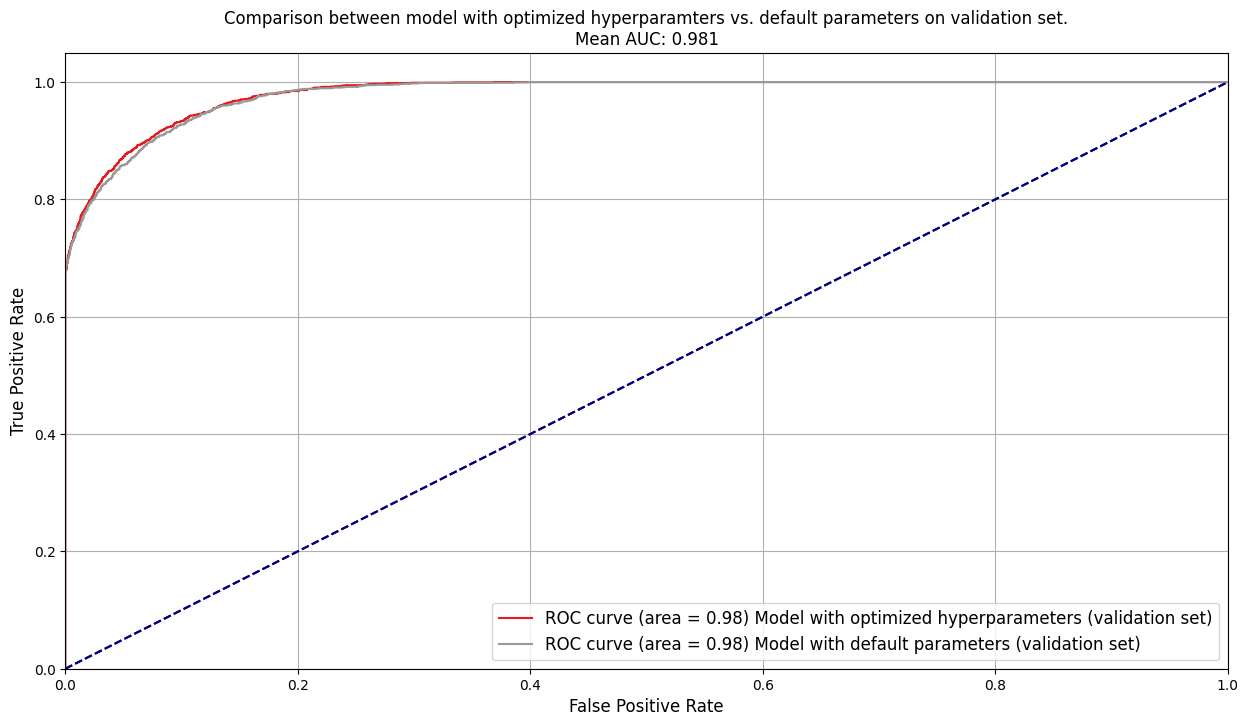

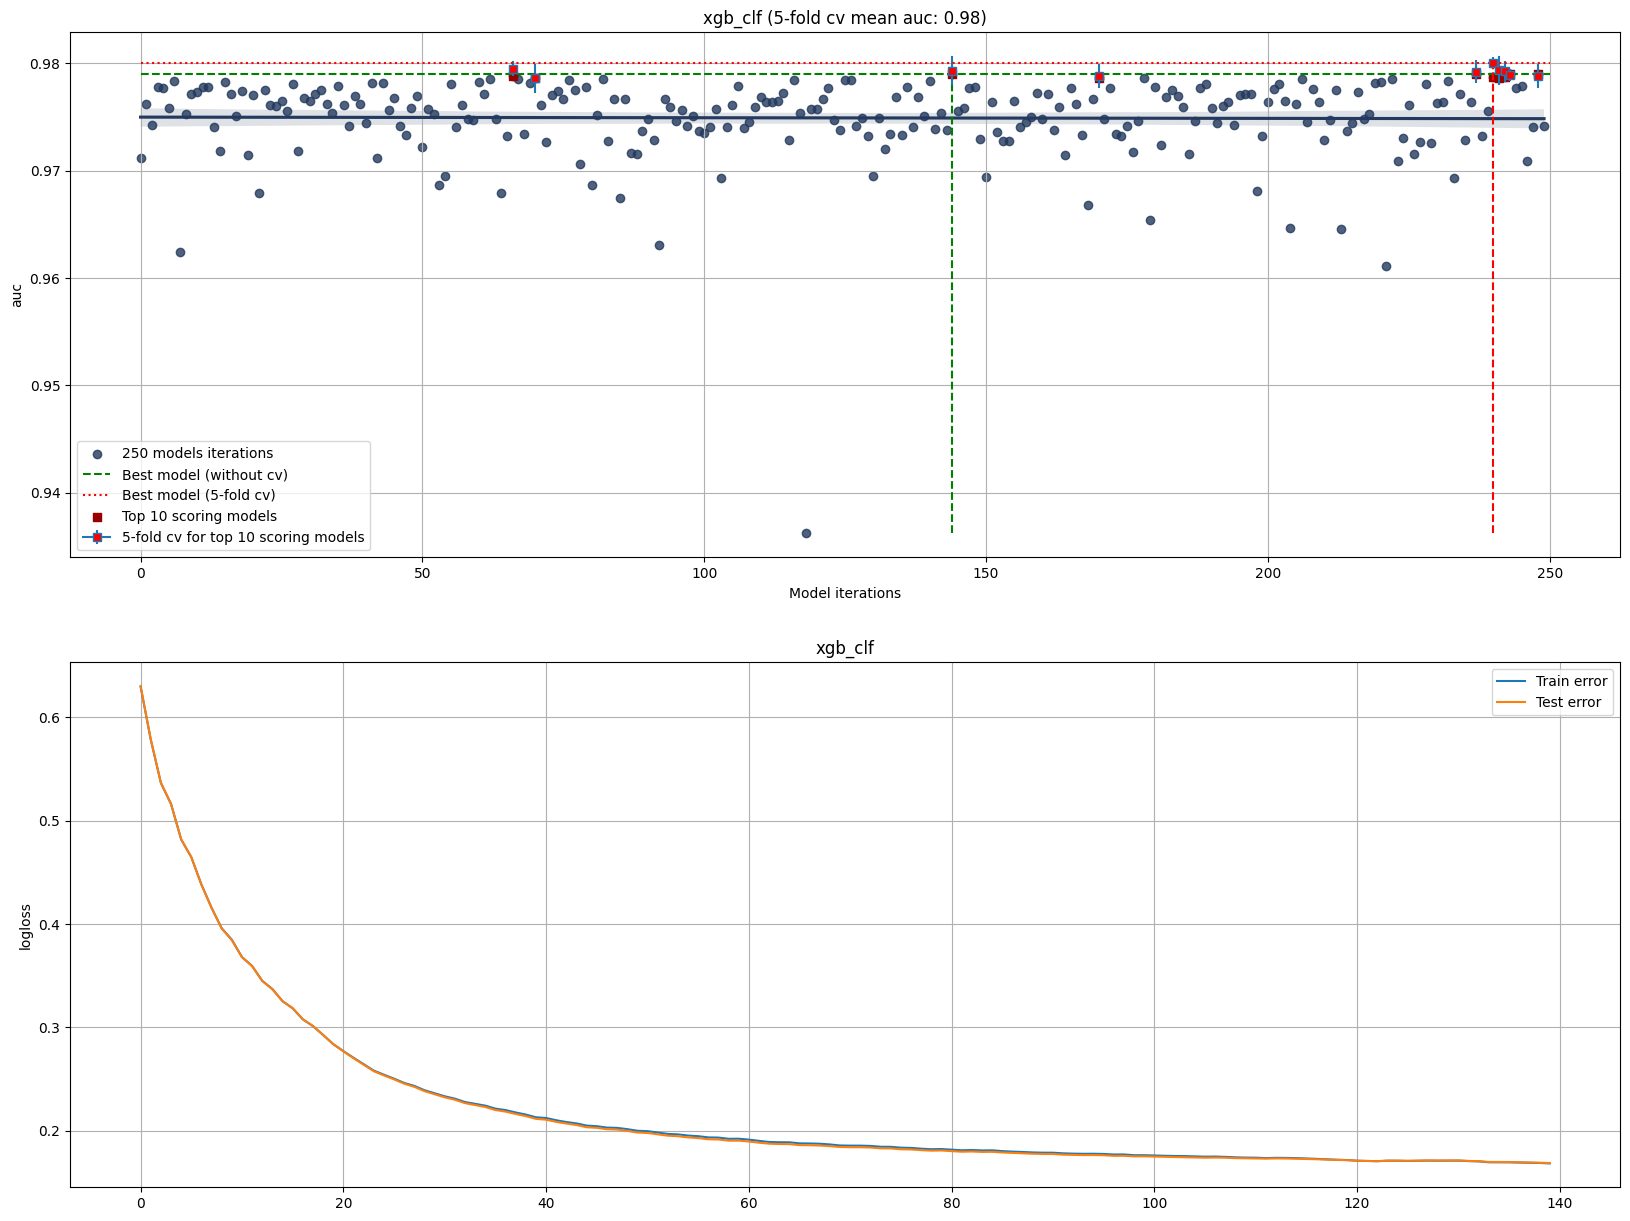

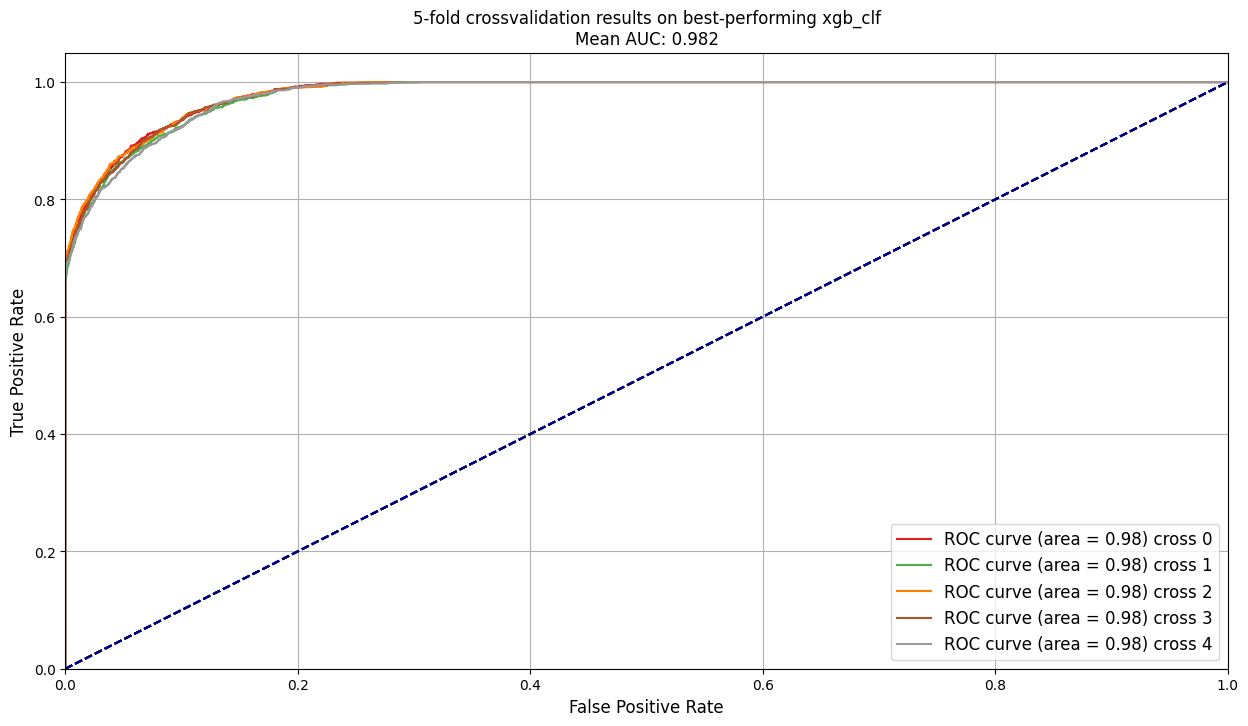

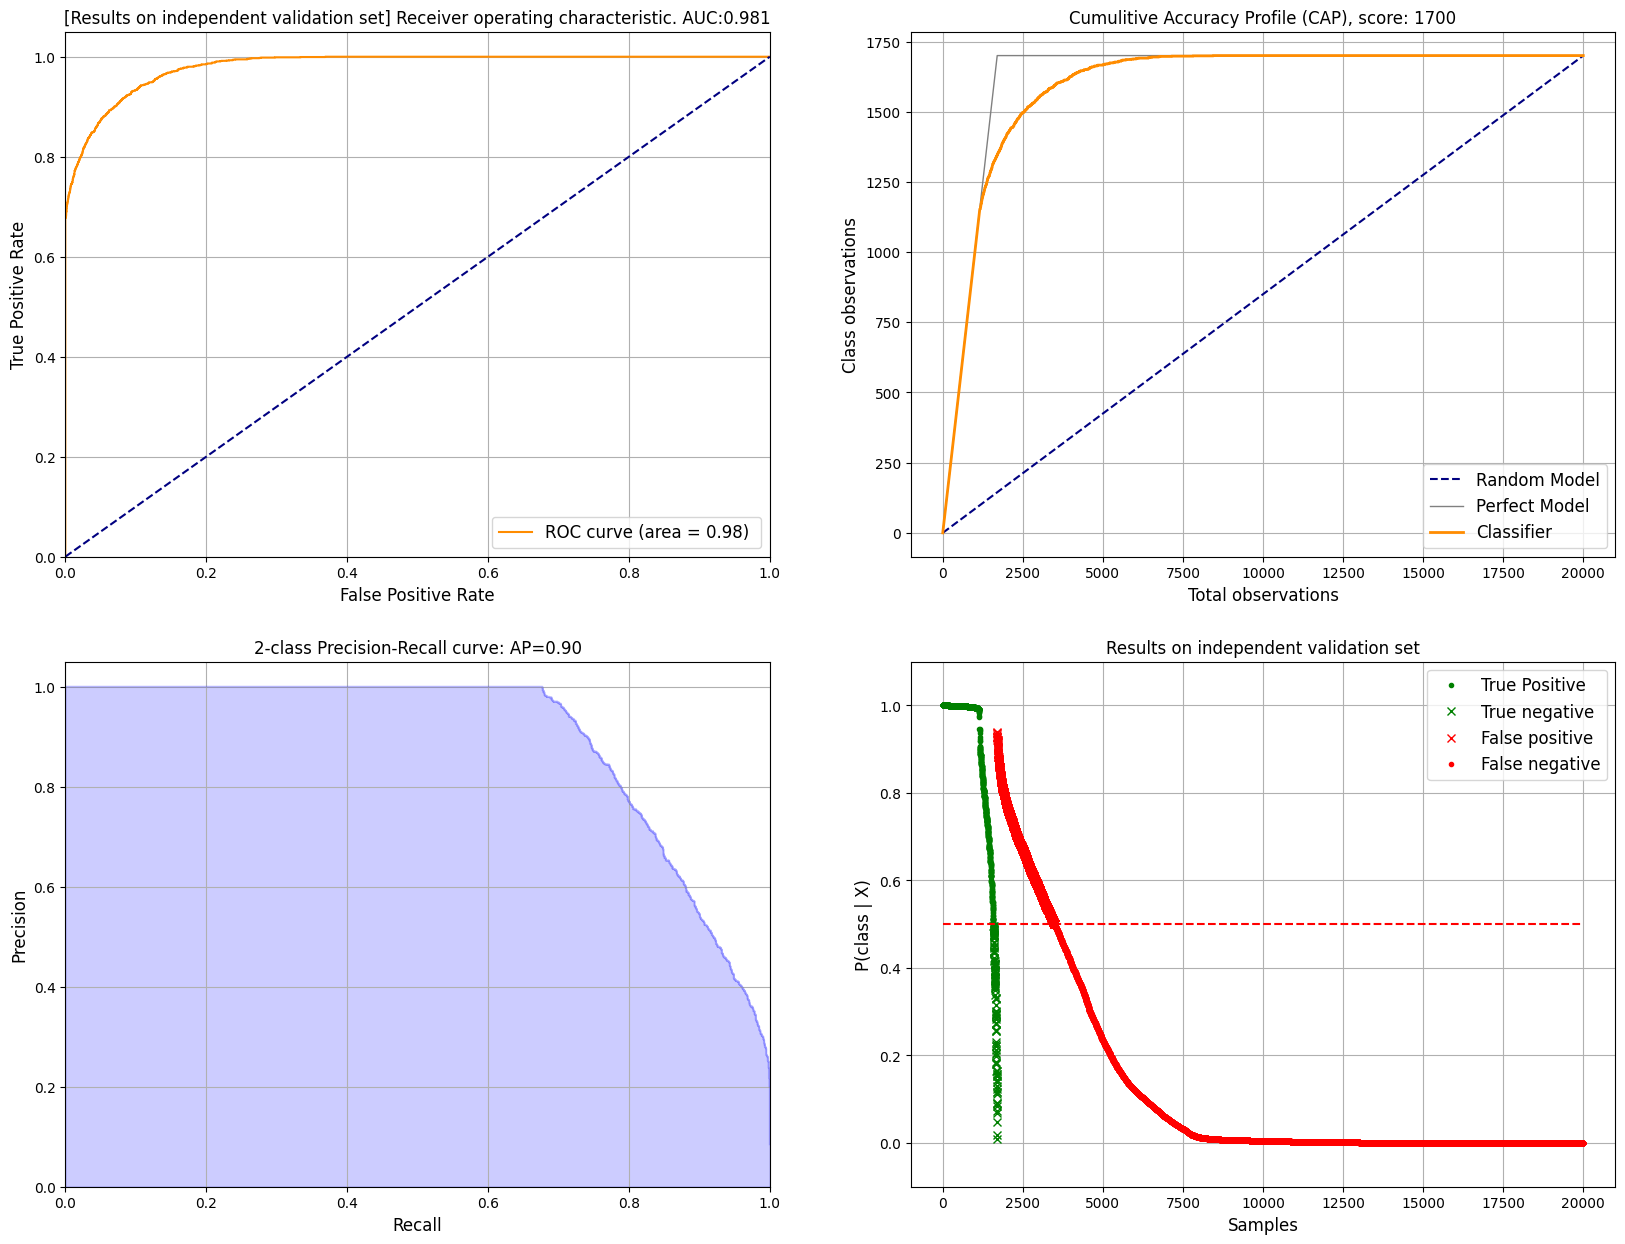

[treeplot] >Best detected tree: 139
[treeplot] >Install graphviz first: <sudo apt install python-pydot python-pydot-ng graphviz>


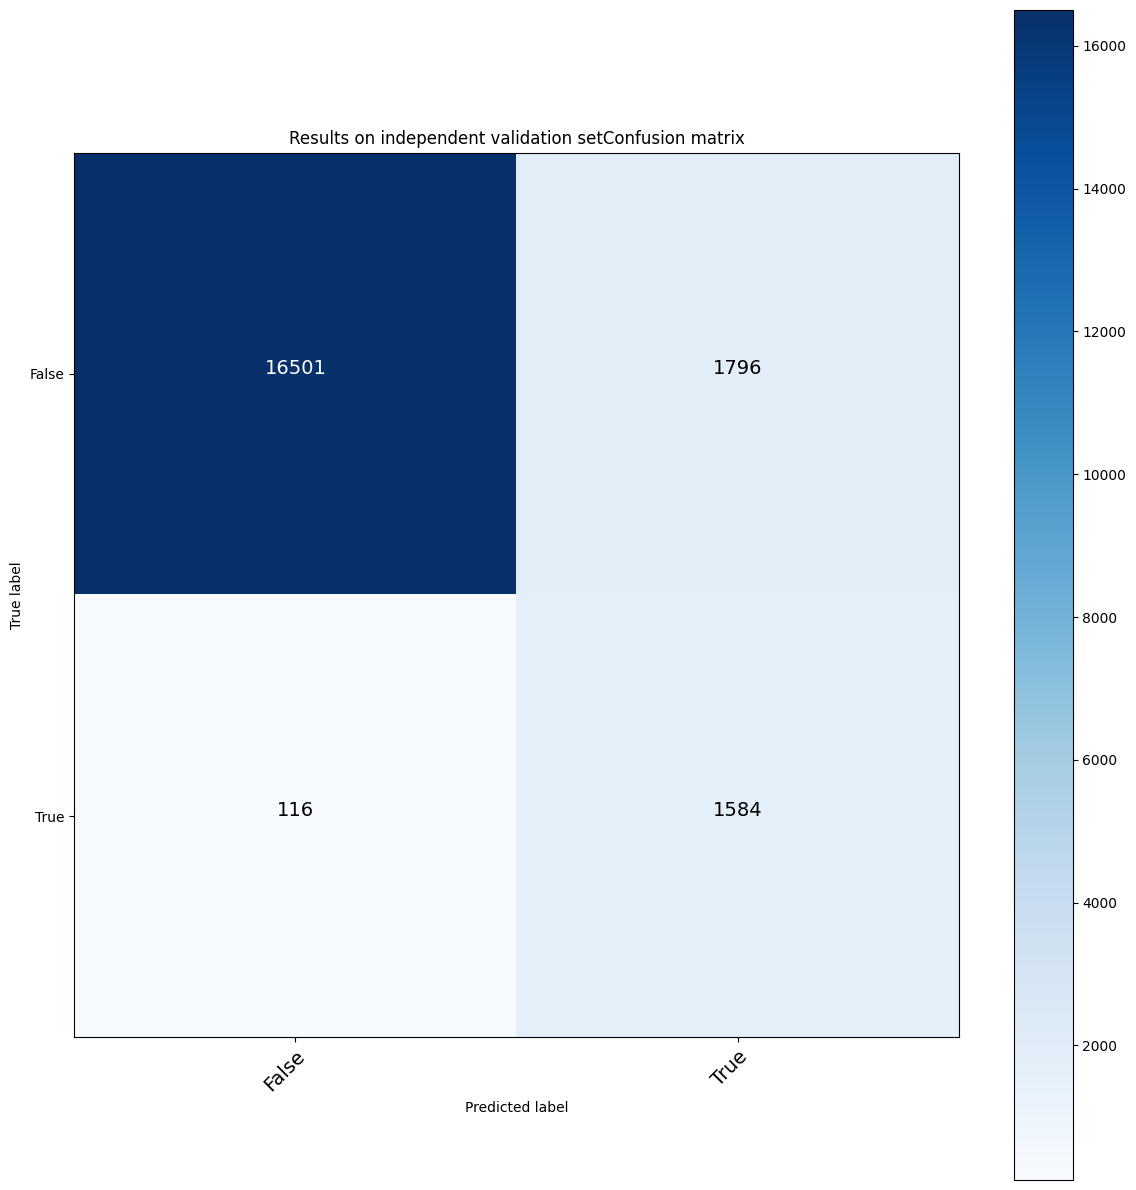

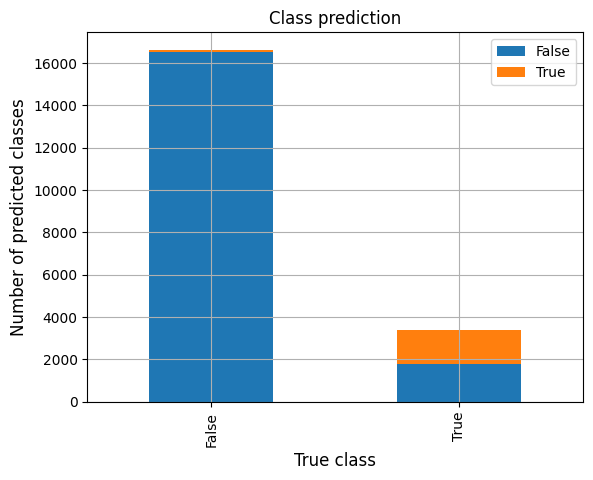

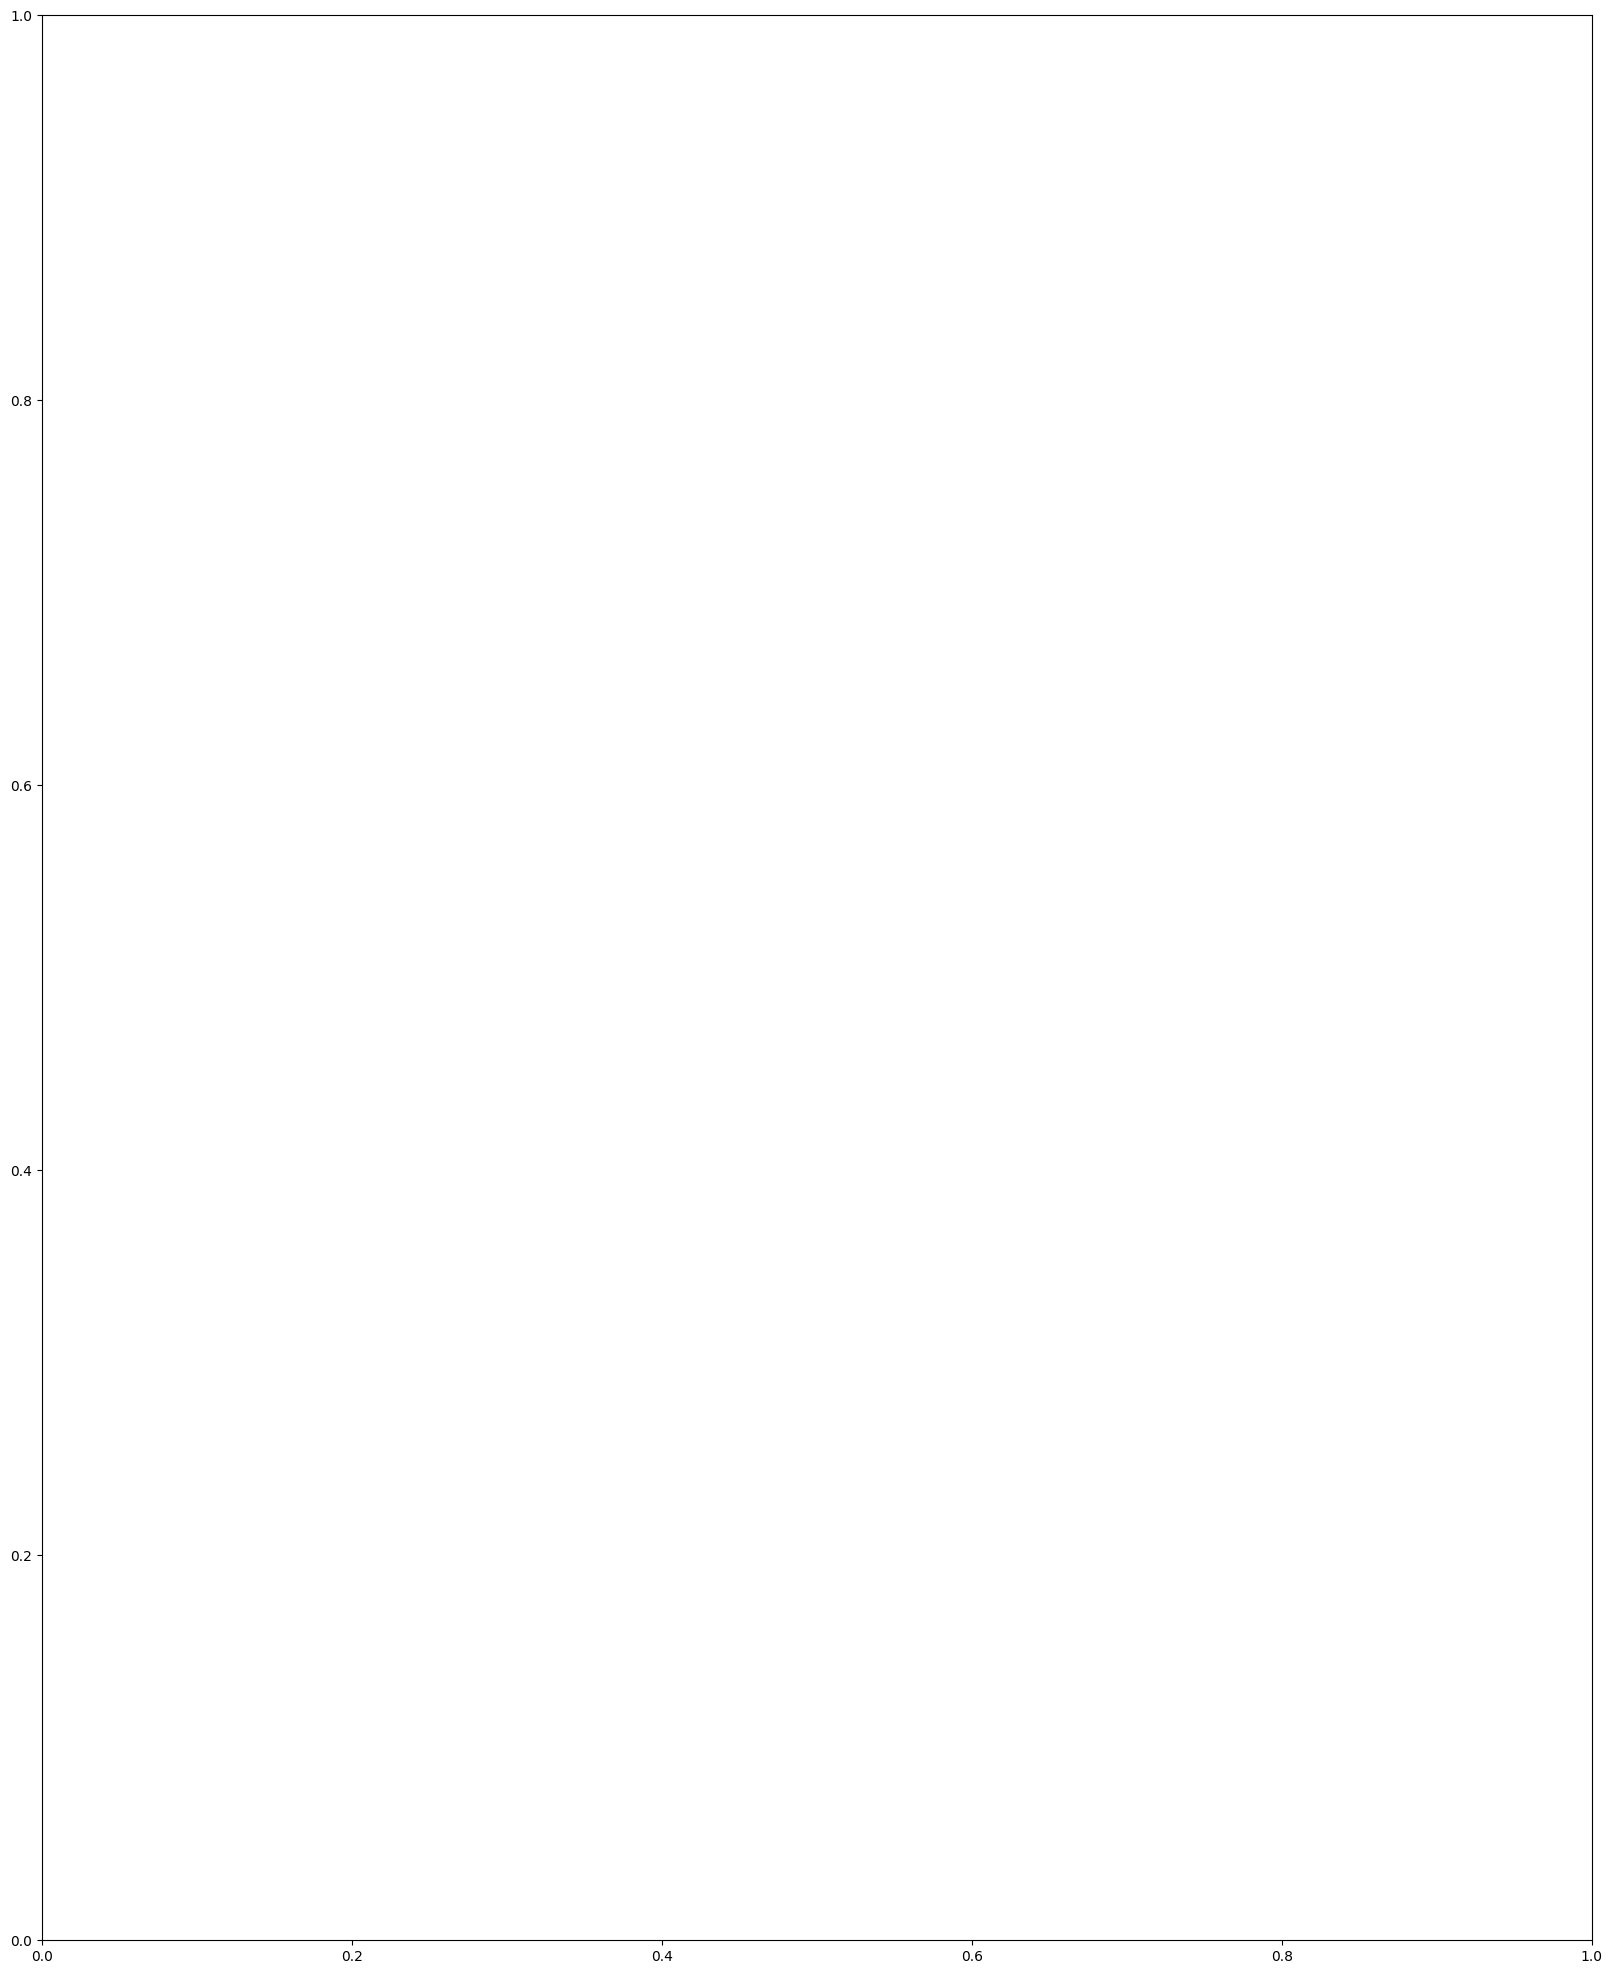

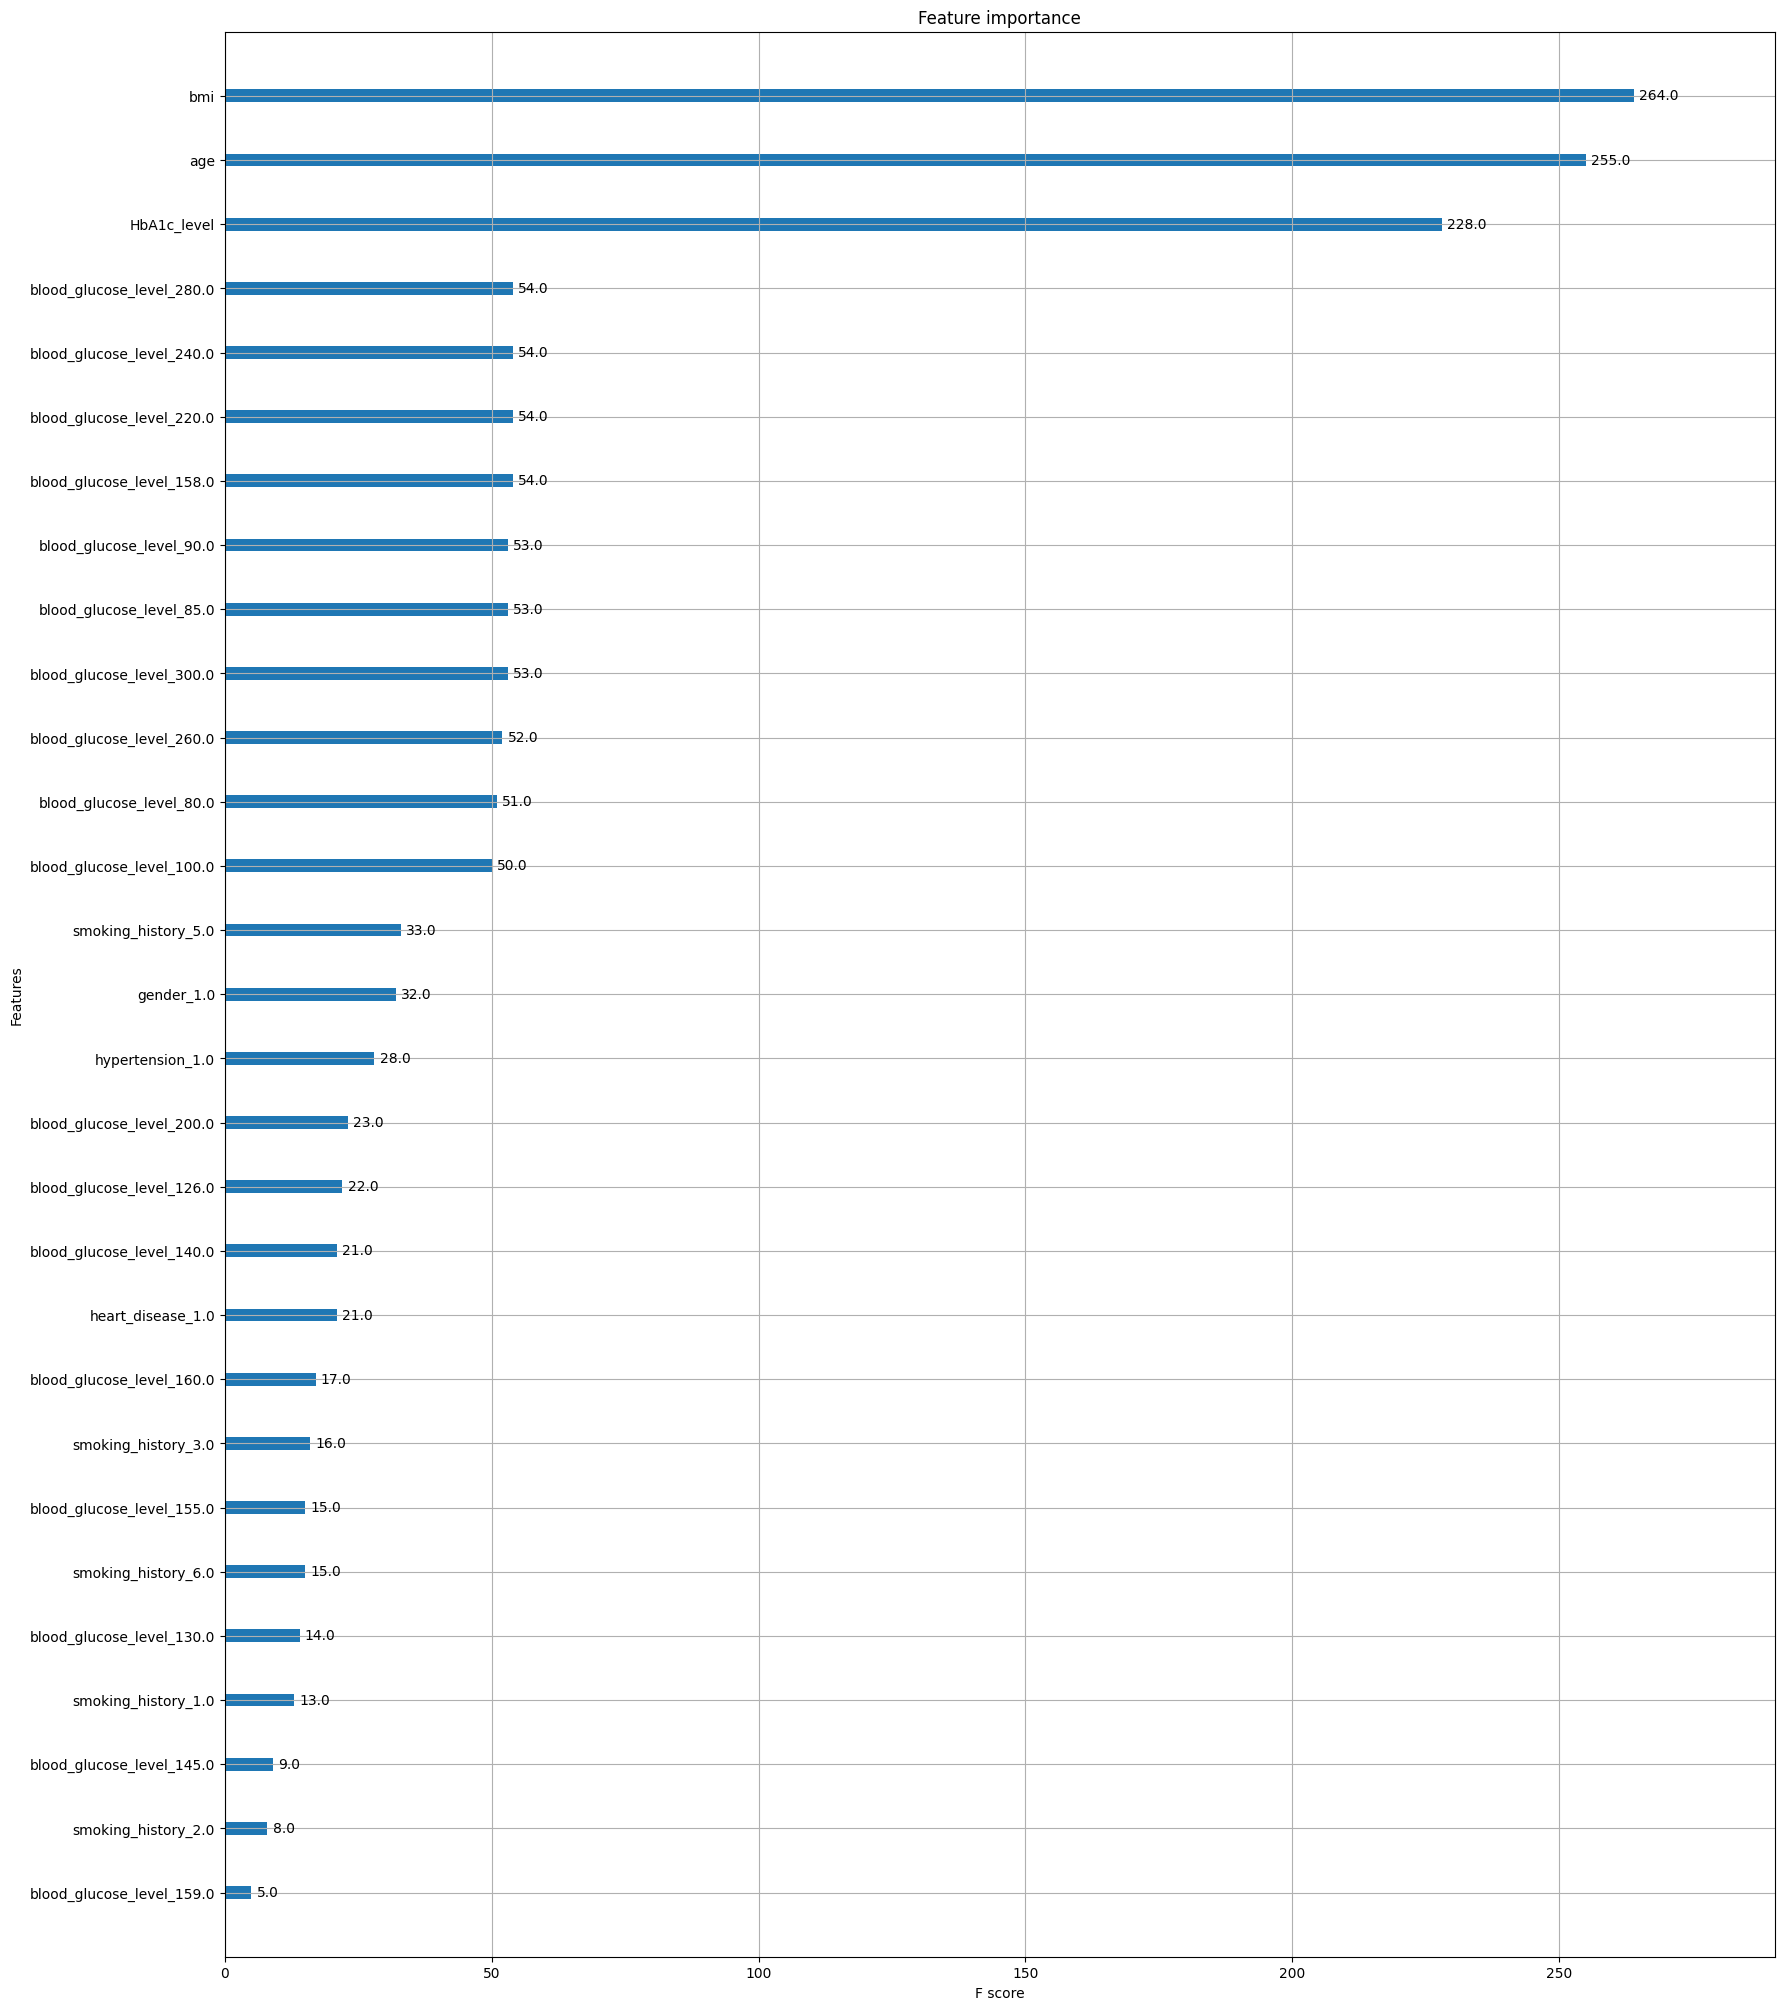

In [86]:

print(hgb.results)

# Plot the hyperparameter tuning.
hgb.plot_params()

# Plot the summary of all evaluted models.
hgb.plot()

# Plot results on the k-fold cross-validation.
hgb.plot_cv()

# Plot results on the validation set.
hgb.plot_validation()

# Plot the best performing tree.
hgb.treeplot()